In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('producao_santos_original.csv', sep=";" , decimal=',',encoding = "ISO-8859-1")

In [4]:
dados.head()

,Bacia,Campo,Estado,Contrato,Concessionária,Ind. Operadora,Percentual de Participação,Mês,Ano,Localização (Terra/Mar),...,Produção de Água (m³),Vol. Gás Injetado para Armazenamento (Mm³),Vol. Queima de Gás (Mm³),Vol. Gás para Consumo (Mm³),Vol. Gás Royalties (Mm³),Vol. Circulação Gás Lift (Mm³),Vol. Gás Injetado Recup. Secundária (Mm³),Vol. Água Injetado Recup. Secundária (m³),Vol. Água Injetado Descarte (m³),Vol. Água Produzida Descartada (m³)
0,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,11,2020,MAR,...,"91,909","0,00","4.105,803","7.418,695","11.452,519","0,00","29.035,219","0,00",0.0,"0,00"
1,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,5,2017,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"
2,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,1,2018,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"
3,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,7,2019,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"
4,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,7,2017,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"


O arquivo do banco de dados original foi obtidos do site: 
https://cdp.anp.gov.br/ords/r/cdp_apex/consulta-dados-publicos-cdp/produ%C3%A7%C3%A3o-mensal-de-hidrocarbonetos.

Optou-se por manter no arquivos apenas as variáveis para realizar a exploração inicial dos dados, sendo que a variável target é a previsão univaridada da variável 'Produção de Petróleo (m³)'.
Como cada 

In [5]:
dados.columns

Index(['Bacia', 'Campo', 'Estado', 'Contrato', 'Concessionária',
       'Ind. Operadora', 'Percentual de Participação', 'Mês', 'Ano',
       'Localização (Terra/Mar)', 'Lâmina D'Água (m)', '°API',
       'Data Início Produção', 'Data Descoberta', 'Área (Km²)',
       'Vol. Gás Disponível (Mm³)', 'Produção de Petróleo (m³)',
       'Produção de Óleo (m³)', 'Produção de Gás Total(Mm³)',
       'Produção de Gás Associado (Mm³)',
       'Produção de Gás Não Associado (Mm³)', 'Produção de Condensado (m³)',
       'Produção de Água (m³)', 'Vol. Gás Injetado para Armazenamento (Mm³)',
       'Vol. Queima de Gás (Mm³)', 'Vol. Gás para Consumo (Mm³)',
       'Vol. Gás Royalties (Mm³)', 'Vol. Circulação Gás Lift (Mm³)',
       'Vol. Gás Injetado Recup. Secundária (Mm³)',
       'Vol. Água Injetado Recup. Secundária (m³)',
       'Vol. Água Injetado Descarte (m³)',
       'Vol. Água Produzida Descartada (m³)'],
      dtype='object')

In [6]:
cols = ['Mês', 'Ano','Data Início Produção','Bacia', 'Campo', 'Estado','Localização (Terra/Mar)' ,  "Lâmina D'Água (m)" , 'Produção de Petróleo (m³)']

In [7]:
df = dados[cols]

In [8]:
df.sample(5)

,Mês,Ano,Data Início Produção,Bacia,Campo,Estado,Localização (Terra/Mar),Lâmina D'Água (m),Produção de Petróleo (m³)
609,7,2016,10/03/2015,Santos,BÚZIOS,Rio de Janeiro,MAR,"1.940,00","18.527,70"
1822,4,2021,01/11/2018,Santos,NORDESTE DE SAPINHOÁ,São Paulo,MAR,"2.184,00","3.457,384"
2807,9,2020,29/12/2010,Santos,TUPI,Rio de Janeiro,MAR,"2.156,00","4.544.613,271"
725,2,2000,31/12/1993,Santos,CARAVELA,Paraná,MAR,"172,00","28.399,00"
1353,9,2014,30/09/1992,Santos,MERLUZA,São Paulo,MAR,"131,00","1.115,388"


In [9]:
df.loc[:,'data'] = (df['Mês'].astype(str) + df['Ano'].astype(str)).values
df['data']= df['data'].apply( lambda x: pd.to_datetime( x , format = "%m%Y") )

C:\Users\herli\AppData\Local\Temp\ipykernel_38468\460621856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'data'] = (df['Mês'].astype(str) + df['Ano'].astype(str)).values
C:\Users\herli\AppData\Local\Temp\ipykernel_38468\460621856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data']= df['data'].apply( lambda x: pd.to_datetime( x , format = "%m%Y") )


Renomenado as variáveis para facilitar a manipulação.

In [10]:
df.drop(columns=['Mês','Ano'] , inplace = True)
df.rename( columns={'Data Início Produção': 'data_ini_prod',
                    'Localização (Terra/Mar)': 'localizacao',
                    "Lâmina D'Água (m)": 'profundidade',
                    "Produção de Petróleo (m³)": 'target',
                    "Bacia" : 'bacia' , 
                    "Campo" : 'campo' ,
                    "Estado" : 'estados'} , inplace = True)

C:\Users\herli\AppData\Local\Temp\ipykernel_38468\3729445234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Mês','Ano'] , inplace = True)
C:\Users\herli\AppData\Local\Temp\ipykernel_38468\3729445234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename( columns={'Data Início Produção': 'data_ini_prod',


In [11]:
df['target'] = df['target'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)
df['profundidade']  = df['profundidade'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)

C:\Users\herli\AppData\Local\Temp\ipykernel_38468\2433695148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)
C:\Users\herli\AppData\Local\Temp\ipykernel_38468\2433695148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profundidade']  = df['profundidade'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)


In [12]:
df = df[df['target'] != 0]

In [13]:
df.shape

(2325, 8)

In [14]:
df = df.sort_values( by =['data'] ).reset_index(drop=True)

In [15]:
df[df['campo'] == 'MERLUZA']

,data_ini_prod,bacia,campo,estados,localizacao,profundidade,target,data
1,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,9062.000,2000-01-01
2,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,9926.000,2000-02-01
4,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,7072.000,2000-03-01
7,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,6660.000,2000-04-01
8,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,8582.000,2000-05-01
...,...,...,...,...,...,...,...,...
1567,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,18.780,2020-11-01
1579,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,23.070,2020-12-01
1594,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,6.780,2021-01-01
1616,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,6.220,2021-02-01


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='data', ylabel='target'>

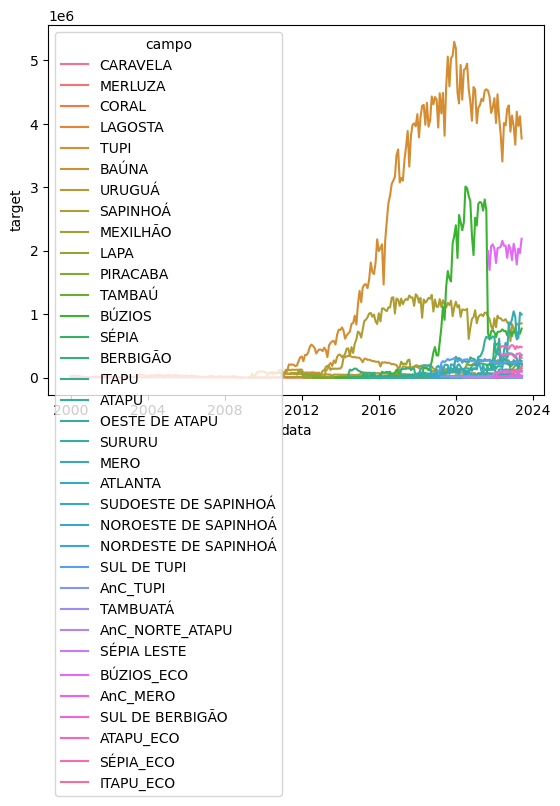

In [16]:
sns.lineplot(data = df , y='target' , x ='data', hue='campo')

In [17]:
df['localizacao'].value_counts()

localizacao
MAR    2325
Name: count, dtype: int64

In [18]:
df.groupby('campo').min()['data_ini_prod']

campo
ATAPU                   05/05/2015
ATAPU_ECO               01/05/2022
ATLANTA                 02/05/2018
AnC_MERO                01/01/2022
AnC_NORTE_ATAPU         01/06/2020
AnC_TUPI                01/05/2019
BAÚNA                   19/02/2012
BERBIGÃO                14/11/2019
BÚZIOS                  10/03/2015
BÚZIOS_ECO              01/09/2021
CARAVELA                31/12/1993
CORAL                   03/02/2003
ITAPU                   01/08/2016
ITAPU_ECO               01/12/2022
LAGOSTA                 25/04/2009
LAPA                    19/12/2016
MERLUZA                 30/09/1992
MERO                    01/12/2017
MEXILHÃO                19/04/2011
NORDESTE DE SAPINHOÁ    01/11/2018
NOROESTE DE SAPINHOÁ    01/11/2018
OESTE DE ATAPU          26/06/2020
PIRACABA                19/02/2012
SAPINHOÁ                05/01/2013
SUDOESTE DE SAPINHOÁ    01/11/2018
SUL DE BERBIGÃO         01/02/2022
SUL DE TUPI             01/02/2019
SURURU                  02/06/2020
SÉPIA         

In [19]:
df_plot = df.set_index('data')

<Axes: xlabel='data'>

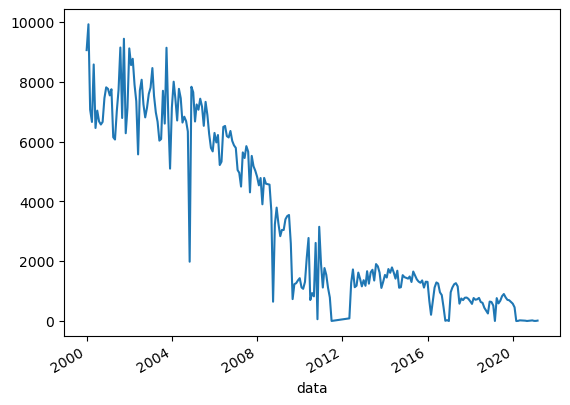

In [20]:
df_plot[df_plot['campo'] == 'MERLUZA']['target'].plot()

In [21]:
df_plot[df_plot['campo'] == 'MERLUZA'].describe()

,profundidade,target
count,242.0,242.000000
mean,131.0,3530.645868
std,0.0,2911.218002
min,131.0,2.630000
25%,131.0,1086.593000
50%,131.0,1868.574000
75%,131.0,6484.250000
max,131.0,9926.000000


<Axes: xlabel='data'>

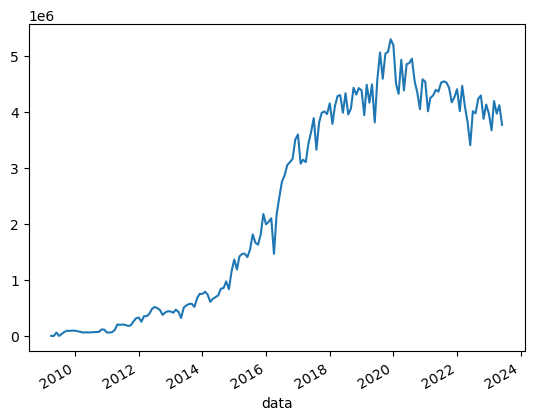

In [22]:
df_plot[df_plot['campo'] == 'TUPI']['target'].plot()

<Axes: xlabel='data'>

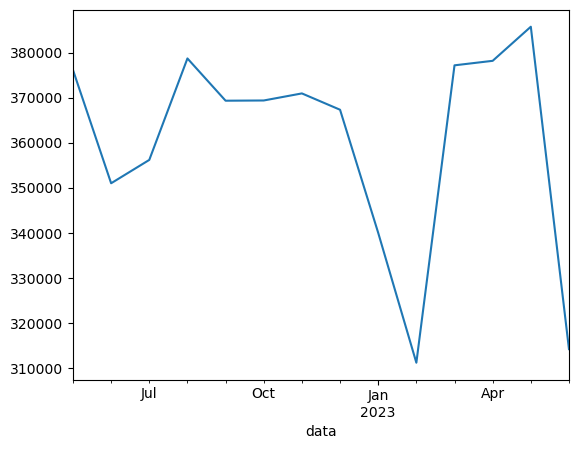

In [23]:
df_plot[df_plot['campo'] == 'ATAPU_ECO']['target'].plot() 

Vamos retirar as bacias que estão com a produção zerada no último mês.

In [24]:
df[(df['target'] == 0) & ( df['data'] == '2023-06-01')]

,data_ini_prod,bacia,campo,estados,localizacao,profundidade,target,data


Vamos retirar também séries muito curtas, com produção iniciada posterior a 2020.

In [25]:
df['data_ini_prod'] = pd.to_datetime(df['data_ini_prod'])

C:\Users\herli\AppData\Local\Temp\ipykernel_38468\2129631155.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_ini_prod'] = pd.to_datetime(df['data_ini_prod'])


In [26]:
df[(df['data_ini_prod'] >= '2020-01-01')]['campo'].unique()

array(['OESTE DE ATAPU', 'SURURU', 'AnC_NORTE_ATAPU', 'SÉPIA LESTE',
       'BÚZIOS_ECO', 'AnC_MERO', 'SUL DE BERBIGÃO', 'ATAPU_ECO',
       'SÉPIA_ECO', 'ITAPU_ECO'], dtype=object)

Portanto, as bacias que são filtradas por esse critério são as:

In [27]:
filtro_bacias = ['LAGOSTA', 'MERLUZA', 'OESTE DE ATAPU', 'SURURU', 'AnC_NORTE_ATAPU', 'SÉPIA LESTE', 'BÚZIOS_ECO', 'AnC_MERO', 'SUL DE BERBIGÃO', 'SÉPIA_ECO','ATAPU_ECO', 'ITAPU_ECO']

In [28]:
df = df[ ~df['campo'].isin(filtro_bacias)]

In [29]:
df.shape

(1718, 8)

C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='data', ylabel='target'>

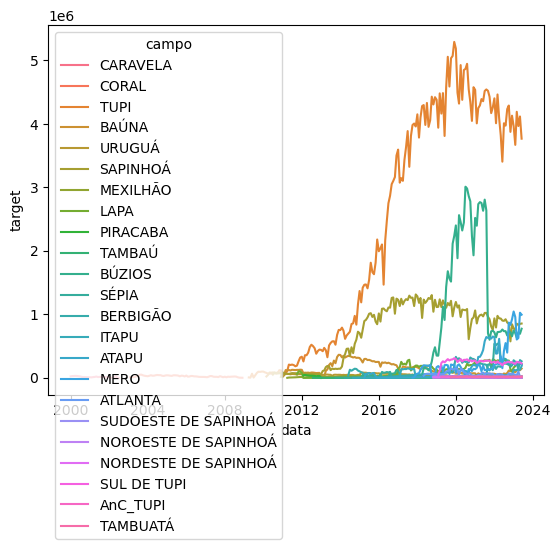

In [30]:
sns.lineplot(data = df , y='target' , x ='data', hue='campo')

Plotando cada série temporal de cada campo que sobrou para ver o comportamento delas.

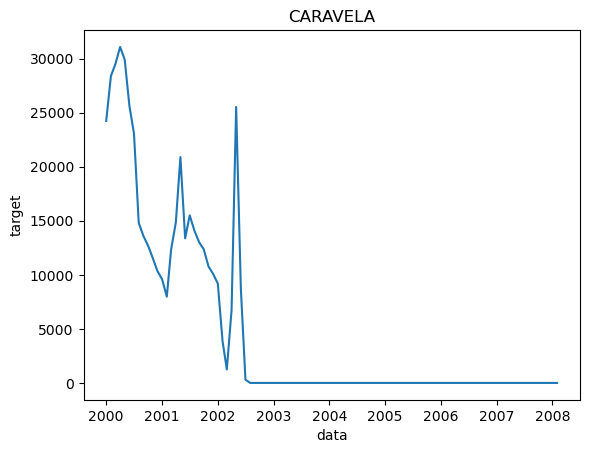

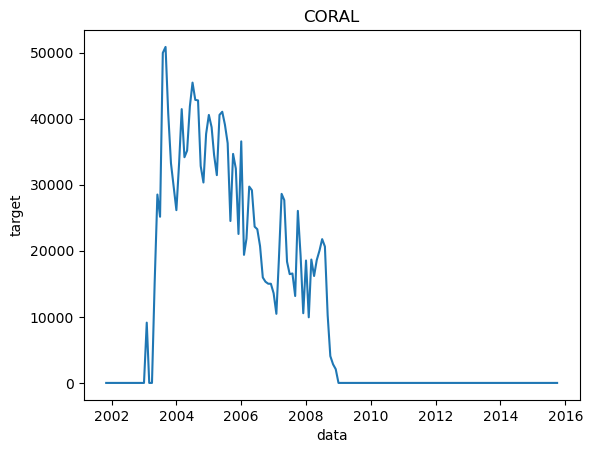

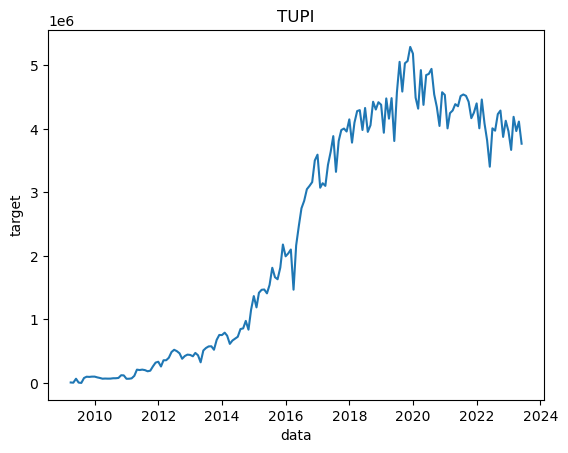

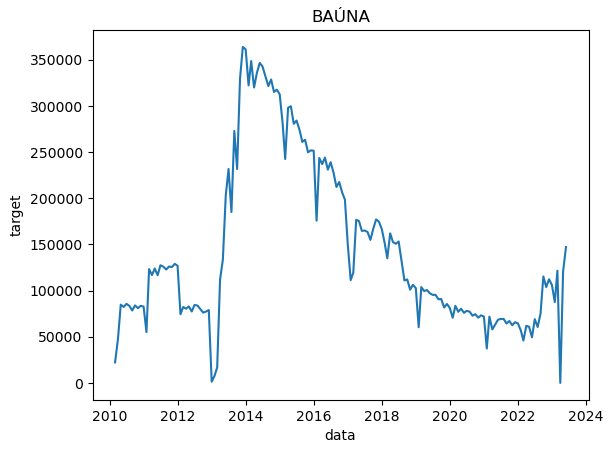

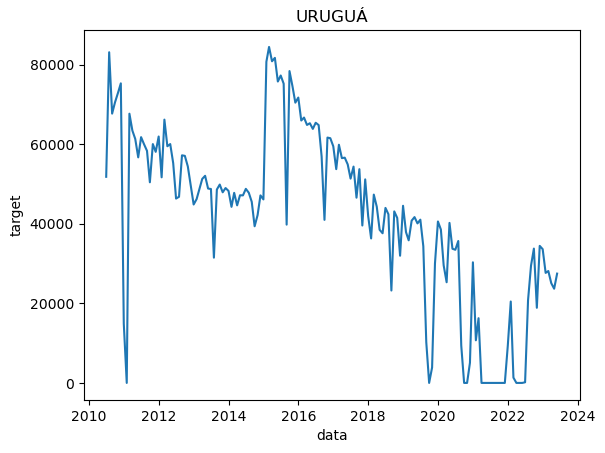

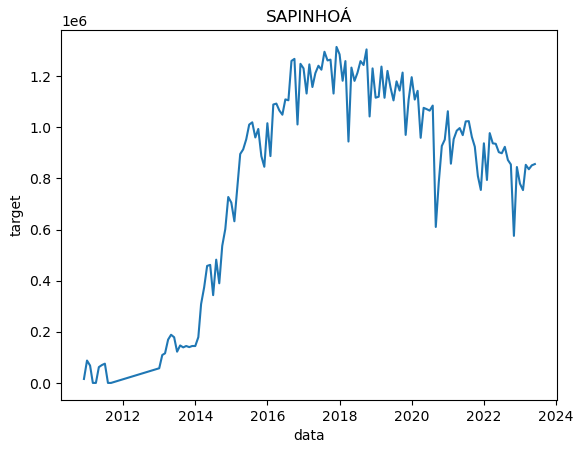

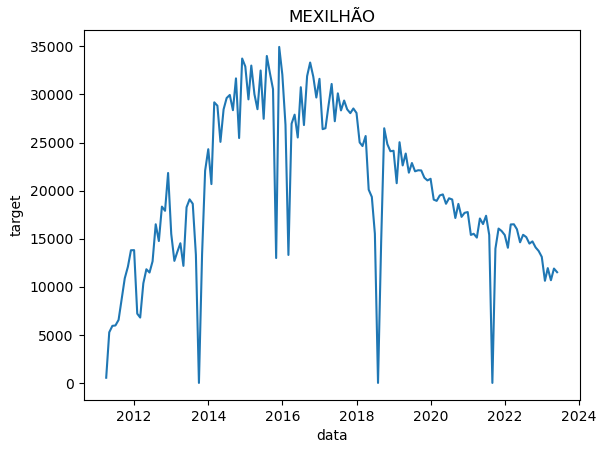

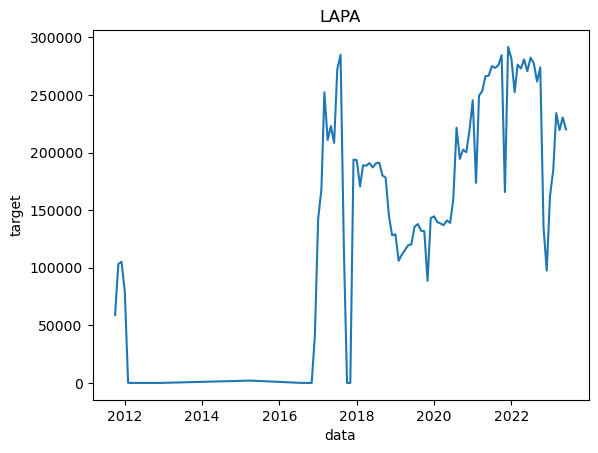

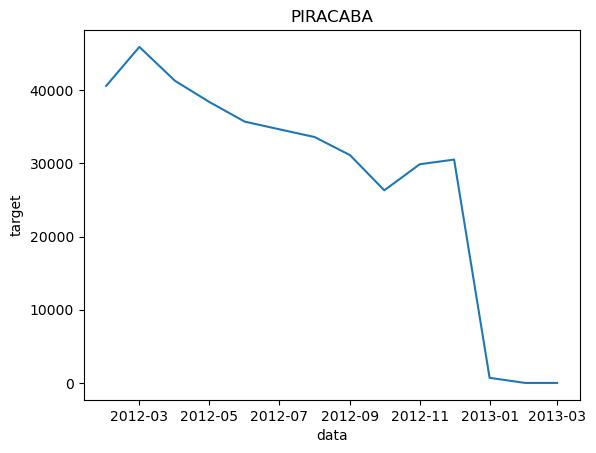

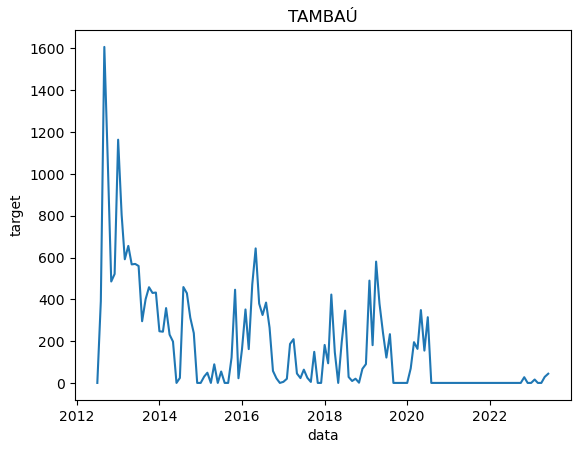

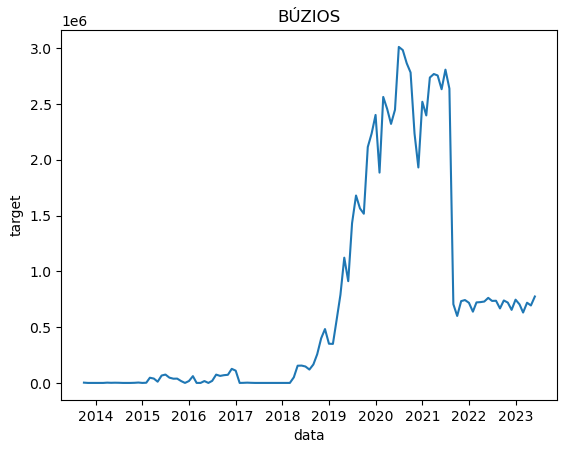

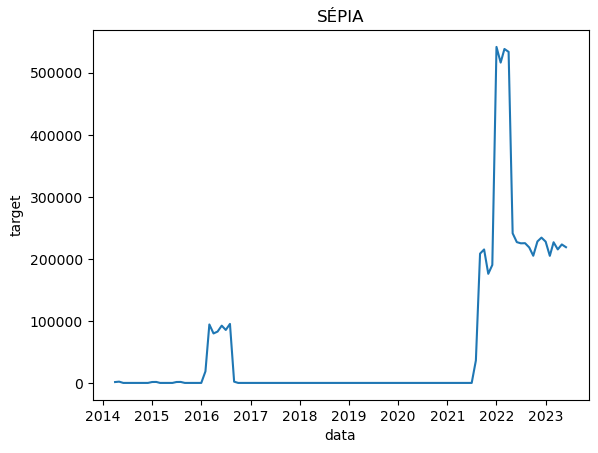

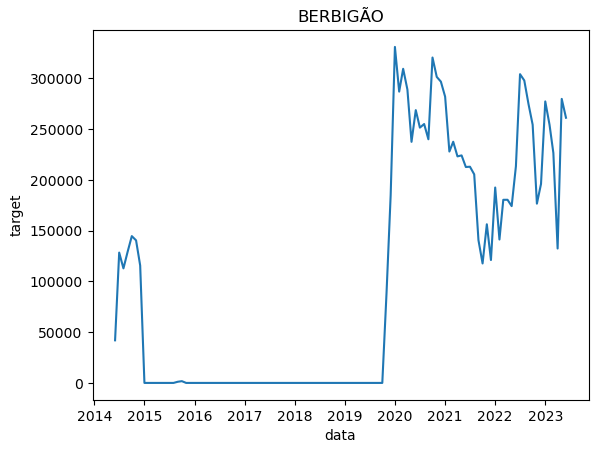

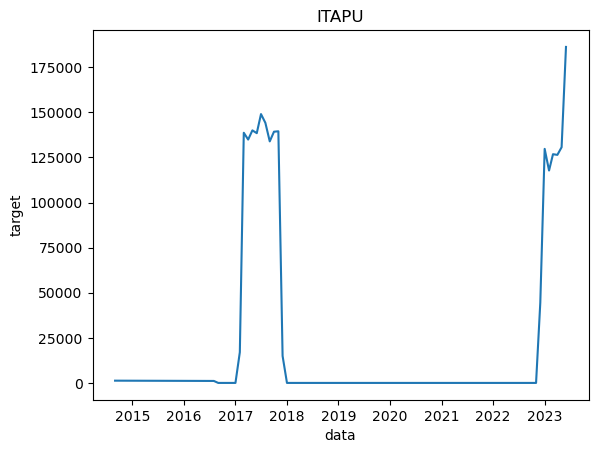

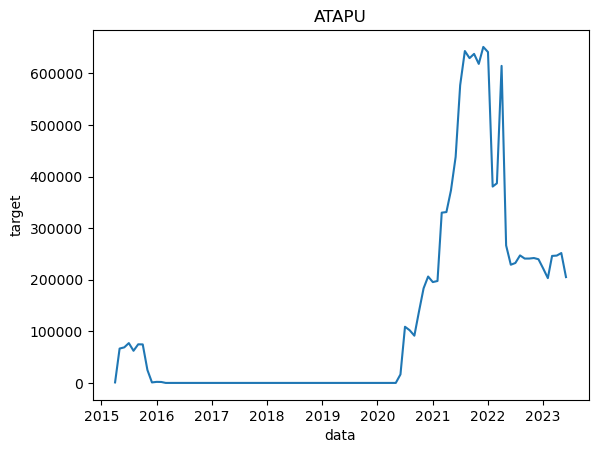

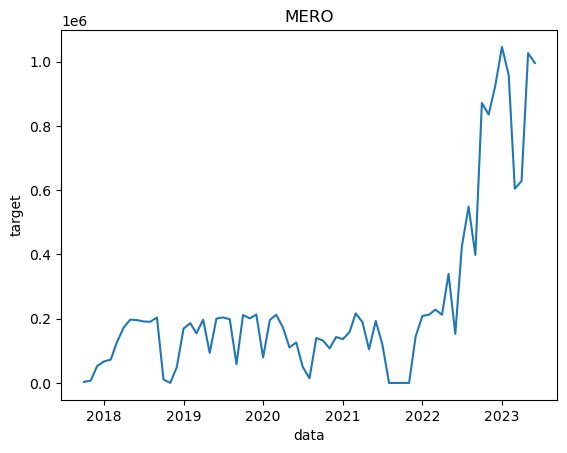

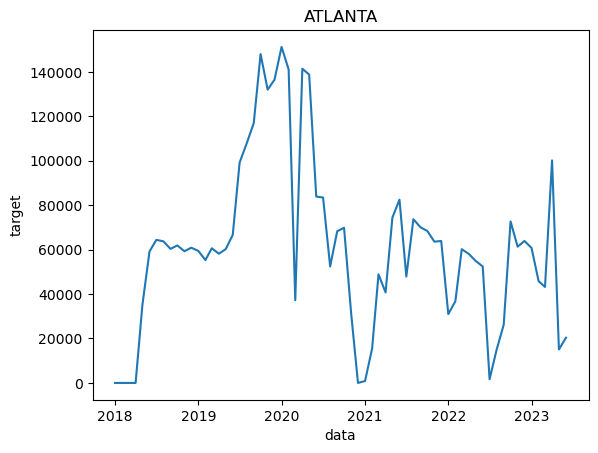

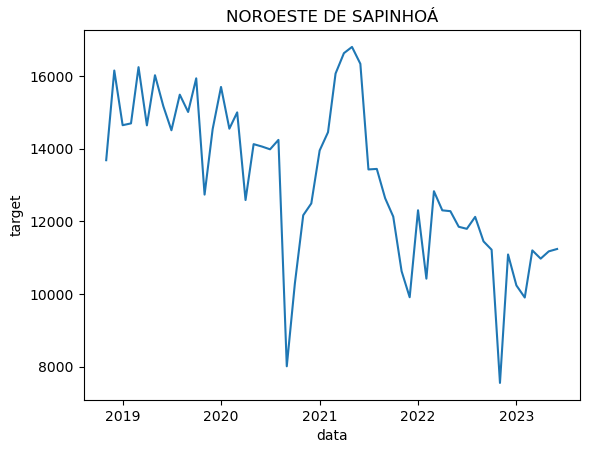

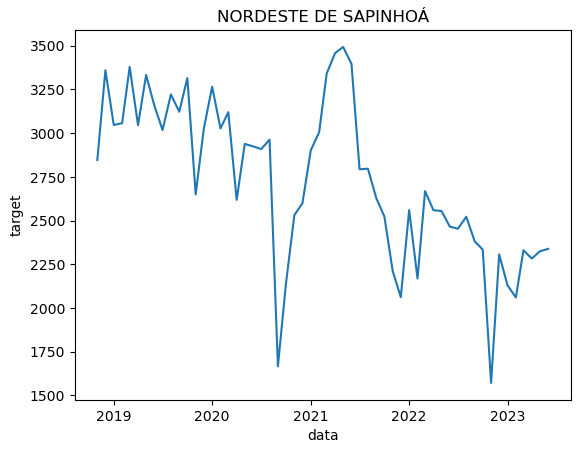

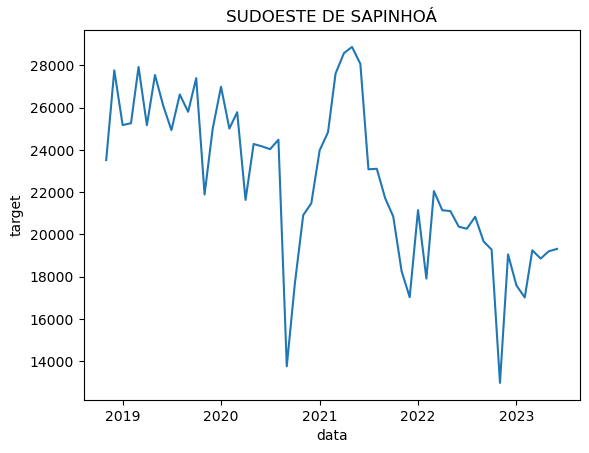

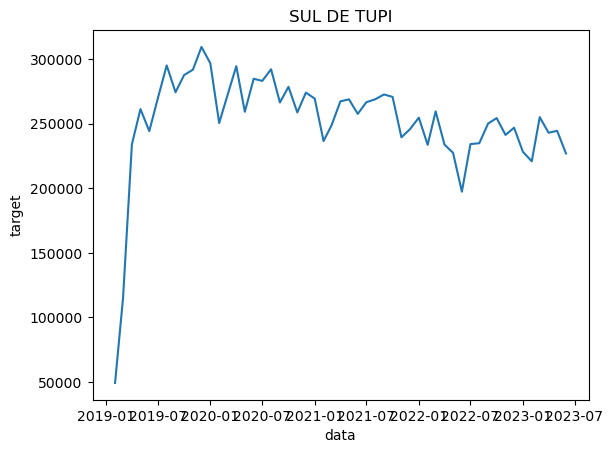

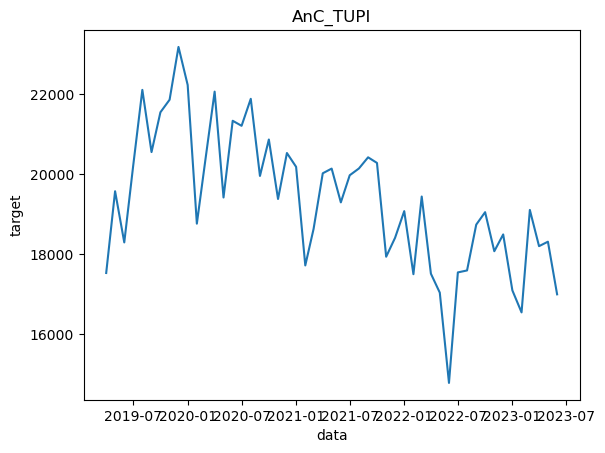

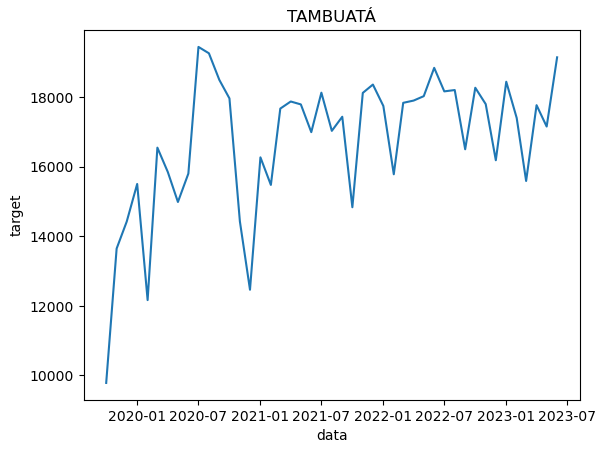

In [166]:
for i in df['campo'].unique():
    sns.lineplot(data = df[df['campo'] == i ] , y='target' , x ='data')
    plt.title(i)
    plt.show()

Notamos pelos gráficos que os filtros que foram feitos não contemplam os campos CARAVELA, CORAL e PIRACABA, que tiveram sua produção interrompida há muito tempo. Assim, faz sentido tirá-los dos estudo.

In [31]:
df = df[ ~ df['campo'].isin( ['CARAVELA','CORAL','PIRACABA'] ) ]

Portanto, sobram as seguintes bacias para realizar a previsão univariada da produção de petróleo de cada:

In [32]:
list( df['campo'].unique() )

['TUPI',
 'BAÚNA',
 'URUGUÁ',
 'SAPINHOÁ',
 'MEXILHÃO',
 'LAPA',
 'TAMBAÚ',
 'BÚZIOS',
 'SÉPIA',
 'BERBIGÃO',
 'ITAPU',
 'ATAPU',
 'MERO',
 'ATLANTA',
 'SUDOESTE DE SAPINHOÁ',
 'NOROESTE DE SAPINHOÁ',
 'NORDESTE DE SAPINHOÁ',
 'SUL DE TUPI',
 'AnC_TUPI',
 'TAMBUATÁ']

In [33]:
len(list( df['campo'].unique() ))

20

Analysing the length of each time series

In [34]:
df.groupby('campo').count()

,data_ini_prod,bacia,estados,localizacao,profundidade,target,data
campo,,,,,,,
ATAPU,48,48,48,48,48,48,48
ATLANTA,61,61,61,61,61,61,61
AnC_TUPI,51,51,51,51,51,51,51
BAÚNA,159,159,159,159,159,159,159
BERBIGÃO,53,53,53,53,53,53,53
BÚZIOS,94,94,94,94,94,94,94
ITAPU,20,20,20,20,20,20,20
LAPA,83,83,83,83,83,83,83
MERO,64,64,64,64,64,64,64


In [35]:
df = df.reset_index(drop=True)

In [36]:
df.to_csv('df_before_prep.csv' , index = False)

Próximos passos:
- Calcular a mtriz de correlações das 20 series.
- ARIMA
- DTW

# Calculating correlation matrix

In [41]:
df.pivot(index = 'data' , columns = 'campo', values ='target').corr(method='spearman')

campo,ATAPU,ATLANTA,AnC_TUPI,BAÚNA,BERBIGÃO,BÚZIOS,ITAPU,LAPA,MERO,MEXILHÃO,NORDESTE DE SAPINHOÁ,NOROESTE DE SAPINHOÁ,SAPINHOÁ,SUDOESTE DE SAPINHOÁ,SUL DE TUPI,SÉPIA,TAMBAÚ,TAMBUATÁ,TUPI,URUGUÁ
campo,,,,,,,,,,,,,,,,,,,,
ATAPU,1.000000,0.110940,-0.111427,-0.727105,-0.470648,0.303770,0.107143,0.685742,0.211564,-0.549260,0.089379,0.089379,-0.067304,0.089379,-0.111427,0.243761,-0.450549,-0.094358,0.497395,-0.753705
ATLANTA,0.110940,1.000000,0.570900,0.128702,-0.206735,0.238022,-0.714286,-0.379535,-0.264320,0.384804,0.247835,0.247835,0.243152,0.247835,0.549987,-0.378458,0.163077,-0.284144,0.558012,0.271662
AnC_TUPI,-0.111427,0.570900,1.000000,0.149580,0.157717,0.539819,-0.178571,-0.282986,-0.577590,0.635726,0.488597,0.488597,0.587330,0.488597,1.000000,-0.200593,0.342857,-0.382345,0.926968,0.160875
BAÚNA,-0.727105,0.128702,0.149580,1.000000,-0.190131,-0.795575,0.057895,-0.352576,-0.115159,0.565711,0.016522,0.016522,-0.085790,0.016522,0.136515,-0.799485,-0.060990,-0.140803,-0.246071,0.420836
BERBIGÃO,-0.470648,-0.206735,0.157717,-0.190131,1.000000,0.548331,0.809524,-0.261875,-0.164728,-0.257919,0.138689,0.138689,0.353008,0.138689,0.157717,0.052372,-0.241176,-0.029598,0.412595,-0.347166
BÚZIOS,0.303770,0.238022,0.539819,-0.795575,0.548331,1.000000,-0.109091,0.086555,-0.355563,-0.528524,0.296241,0.296241,0.074334,0.296241,0.589985,0.555386,-0.027035,0.152174,0.804617,-0.752264
ITAPU,0.107143,-0.714286,-0.178571,0.057895,0.809524,-0.109091,1.000000,0.635294,0.030303,0.278195,0.571429,0.571429,0.431579,0.571429,-0.178571,0.285714,-0.068132,0.500000,0.120301,0.111278
LAPA,0.685742,-0.379535,-0.282986,-0.352576,-0.261875,0.086555,0.635294,1.000000,0.175040,-0.202168,-0.360902,-0.360902,-0.297740,-0.360902,-0.153604,-0.010870,-0.253310,0.417260,0.074241,-0.328358
MERO,0.211564,-0.264320,-0.577590,-0.115159,-0.164728,-0.355563,0.030303,0.175040,1.000000,-0.697197,-0.485158,-0.485158,-0.553434,-0.485158,-0.501531,-0.333333,-0.240394,0.088850,-0.299679,-0.475649


![Bacia](https://comunicabaciadesantos.petrobras.com.br/documents/d/comunica-bacia-de-santos/mapa_agbs?download=true)

C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='data', ylabel='target'>

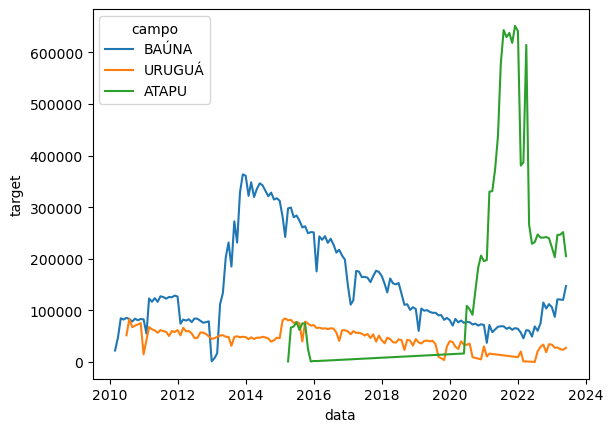

In [44]:
filtro = ['ATAPU', 'BAÚNA','URUGUÁ']
sns.lineplot(data = df[df['campo'].isin(filtro)] , y='target' , x ='data', hue='campo')

<font size=3> Nota-se que ATAPU e BAUNA estão distantes no mapa, o que não faz muito sentindo se levarmos em consideração a alta correlação e os shapes. URUGUA E ATAPU também tem correlação -0.75 o que não parece fazer muito sentido pelos shapes da serie. Vale ressaltar que a correlação calculada está levando em consideração apenas as partes finais das séries, pois há séries que tem dados apenas recentes.

# Calculating DTW between series

In [59]:
# package name for installation dtw-python
from dtw import dtw

In [54]:
a = np.random.random(100)
b = np.random.random(200)

In [73]:
matriz_dtw = {'linha':[] , 
             'coluna':[],
             'dtw': [] }

for i in df['campo'].unique():
    for j in df['campo'].unique():
        a = df[ df['campo'] == i]['target']
        b = df[ df['campo'] == j]['target']
        
        a = (a - a.min()) / (a.max() - a.min())
        b = (b - b.min()) / (b.max() - b.min())
        
        alignment = dtw(a, b)
        
        matriz_dtw['linha'].append( i )
        matriz_dtw['coluna'].append( j )
        matriz_dtw['dtw'].append( alignment.distance )

In [68]:
a = (a - a.min()) / (a.max() - a.min())
b = (b - b.min()) / (b.max() - b.min())

In [70]:
alignment = dtw(a, b)

print(f"DTW Distance: {alignment.distance}")

DTW Distance: 13.80924114863415


In [76]:
pd.DataFrame(matriz_dtw).pivot(index= 'linha' , columns = 'coluna' , values='dtw')

coluna,ATAPU,ATLANTA,AnC_TUPI,BAÚNA,BERBIGÃO,BÚZIOS,ITAPU,LAPA,MERO,MEXILHÃO,NORDESTE DE SAPINHOÁ,NOROESTE DE SAPINHOÁ,SAPINHOÁ,SUDOESTE DE SAPINHOÁ,SUL DE TUPI,SÉPIA,TAMBAÚ,TAMBUATÁ,TUPI,URUGUÁ
linha,,,,,,,,,,,,,,,,,,,,
ATAPU,0.000000,9.959182,9.522956,13.809241,8.931427,6.753855,10.019041,11.497490,8.273513,12.396561,17.925479,17.907104,12.313955,17.920291,12.380400,4.049297,18.922185,12.378802,15.510242,20.519681
ATLANTA,9.959182,0.000000,7.635985,13.061918,11.833007,17.265319,14.621650,14.861681,16.185026,14.280087,12.392016,12.378721,15.917243,12.388255,15.642916,9.642310,11.131905,12.671726,29.008715,17.622700
AnC_TUPI,9.522956,7.635985,0.000000,11.017573,8.727150,21.423321,10.942359,13.637664,18.827860,11.033975,7.736615,7.735835,15.242302,7.736393,11.408443,11.891413,13.322179,11.332193,31.660347,12.051704
BAÚNA,13.809241,13.061918,11.017573,0.000000,18.666202,15.563226,20.245194,19.401366,28.174929,13.503124,23.762001,23.741273,21.900355,23.756307,32.383045,20.255558,16.282779,24.150773,40.859725,19.343025
BERBIGÃO,8.931427,11.833007,8.727150,18.666202,0.000000,13.913496,8.864168,6.495911,9.348336,13.168215,11.679163,11.668113,10.670038,11.676050,6.942769,10.514030,27.663886,6.604747,13.819239,16.023911
BÚZIOS,6.753855,17.265319,21.423321,15.563226,13.913496,0.000000,8.408479,14.048076,13.809476,18.685879,25.603785,25.579445,15.038320,25.596967,16.311713,10.839031,23.406162,16.117958,16.566694,29.102242
ITAPU,10.019041,14.621650,10.942359,20.245194,8.864168,8.408479,0.000000,12.906447,7.460632,22.771704,12.041946,12.048978,12.452365,12.043932,4.814747,9.658205,15.253170,7.410661,12.978369,24.045400
LAPA,11.497490,14.861681,13.637664,19.401366,6.495911,14.048076,12.906447,0.000000,11.938159,17.820350,14.020900,13.986784,13.880878,14.011308,12.016367,15.016285,30.067292,9.479883,14.774733,21.076356
MERO,8.273513,16.185026,18.827860,28.174929,9.348336,13.809476,7.460632,11.938159,0.000000,17.238674,27.879737,27.869226,11.072432,27.876763,10.397016,7.164191,18.359210,11.017739,9.864392,29.785636


# Preprocessing

Normalizing each time series with min-max in [0,1] range. Also, creating features with lagged values of the time series .

In [283]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

In [331]:
import pickle

In [207]:
lag = 10

for i in range(1 , lag+1 ):
    df['x'+str(i)] = df.groupby('campo')['target'].shift(i)

In [231]:
df.columns

Index(['data_ini_prod', 'bacia', 'campo', 'estados', 'localizacao',
       'profundidade', 'target', 'data', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6',
       'x7', 'x8', 'x9', 'x10'],
      dtype='object')

In [248]:
pipe = {}

for j in df['campo'].unique():
    df_temp = df[ df['campo'] == j ][ [ 'x'+str(i) for i in range(1 , lag+1) ] + ['target'] ]
    scaler = MinMaxScaler()
    df_trans = scaler.fit_transform(df_temp)
    pipe[ j ] = []
    pipe[j].append( df_trans)
    pipe[j].append( scaler )

In [377]:
file_to_store = open("preprocessed_data.pickle", "wb")

pickle.dump(pipe , file_to_store)

file_to_store.close()

In [ ]:
file_to_read = open("preprocessed_data.pickle", "rb")

pipe = pickle.load(file_to_read)

file_to_read.close()